In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('./sample_data.csv')
display(df.head())
display(df.describe())

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
count,2784.000000,2773.00000,2774.000000,2781.000000,2784.000000,2779.000000,2776.000000,2780.000000,2774.000000,2784.000000,...,2764.000000,2771.000000,2778.000000,2800.000000,2772.000000,2786.000000,2780.000000,2800.000000,2577.000000,2800.000000
mean,2.413434,4.80238,4.603821,4.699748,4.560345,4.502339,4.369957,4.303957,2.553353,3.296695,...,3.185601,2.969686,4.816055,2.713214,4.438312,4.892319,2.489568,1.671786,3.190144,28.782143
std,1.407737,1.17202,1.301834,1.479633,1.258512,1.241347,1.318347,1.288552,1.375118,1.628542,...,1.569685,1.618647,1.129530,1.565152,1.220901,1.221250,1.327959,0.469647,1.107714,11.127555
min,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,2.000000,...,2.000000,2.000000,4.000000,1.000000,4.000000,4.000000,1.000000,1.000000,3.000000,20.000000
50%,2.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,3.000000,...,3.000000,3.000000,5.000000,2.000000,5.000000,5.000000,2.000000,2.000000,3.000000,26.000000
75%,3.000000,6.00000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,...,4.000000,4.000000,6.000000,4.000000,5.000000,6.000000,3.000000,2.000000,4.000000,35.000000
max,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,2.000000,5.000000,86.000000


# Preprocessing

In [5]:
df = df.iloc[:,0:25] # excluding sex,academic background and age
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      2784 non-null   float64
 1   A2      2773 non-null   float64
 2   A3      2774 non-null   float64
 3   A4      2781 non-null   float64
 4   A5      2784 non-null   float64
 5   C1      2779 non-null   float64
 6   C2      2776 non-null   float64
 7   C3      2780 non-null   float64
 8   C4      2774 non-null   float64
 9   C5      2784 non-null   float64
 10  E1      2777 non-null   float64
 11  E2      2784 non-null   float64
 12  E3      2775 non-null   float64
 13  E4      2791 non-null   float64
 14  E5      2779 non-null   float64
 15  N1      2778 non-null   float64
 16  N2      2779 non-null   float64
 17  N3      2789 non-null   float64
 18  N4      2764 non-null   float64
 19  N5      2771 non-null   float64
 20  O1      2778 non-null   float64
 21  O2      2800 non-null   int64  
 22  

In [6]:
df.dropna(inplace=True) # deleting missing value
df = df.astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2436 entries, 0 to 2799
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A1      2436 non-null   int64
 1   A2      2436 non-null   int64
 2   A3      2436 non-null   int64
 3   A4      2436 non-null   int64
 4   A5      2436 non-null   int64
 5   C1      2436 non-null   int64
 6   C2      2436 non-null   int64
 7   C3      2436 non-null   int64
 8   C4      2436 non-null   int64
 9   C5      2436 non-null   int64
 10  E1      2436 non-null   int64
 11  E2      2436 non-null   int64
 12  E3      2436 non-null   int64
 13  E4      2436 non-null   int64
 14  E5      2436 non-null   int64
 15  N1      2436 non-null   int64
 16  N2      2436 non-null   int64
 17  N3      2436 non-null   int64
 18  N4      2436 non-null   int64
 19  N5      2436 non-null   int64
 20  O1      2436 non-null   int64
 21  O2      2436 non-null   int64
 22  O3      2436 non-null   int64
 23  O4      2436 non-n

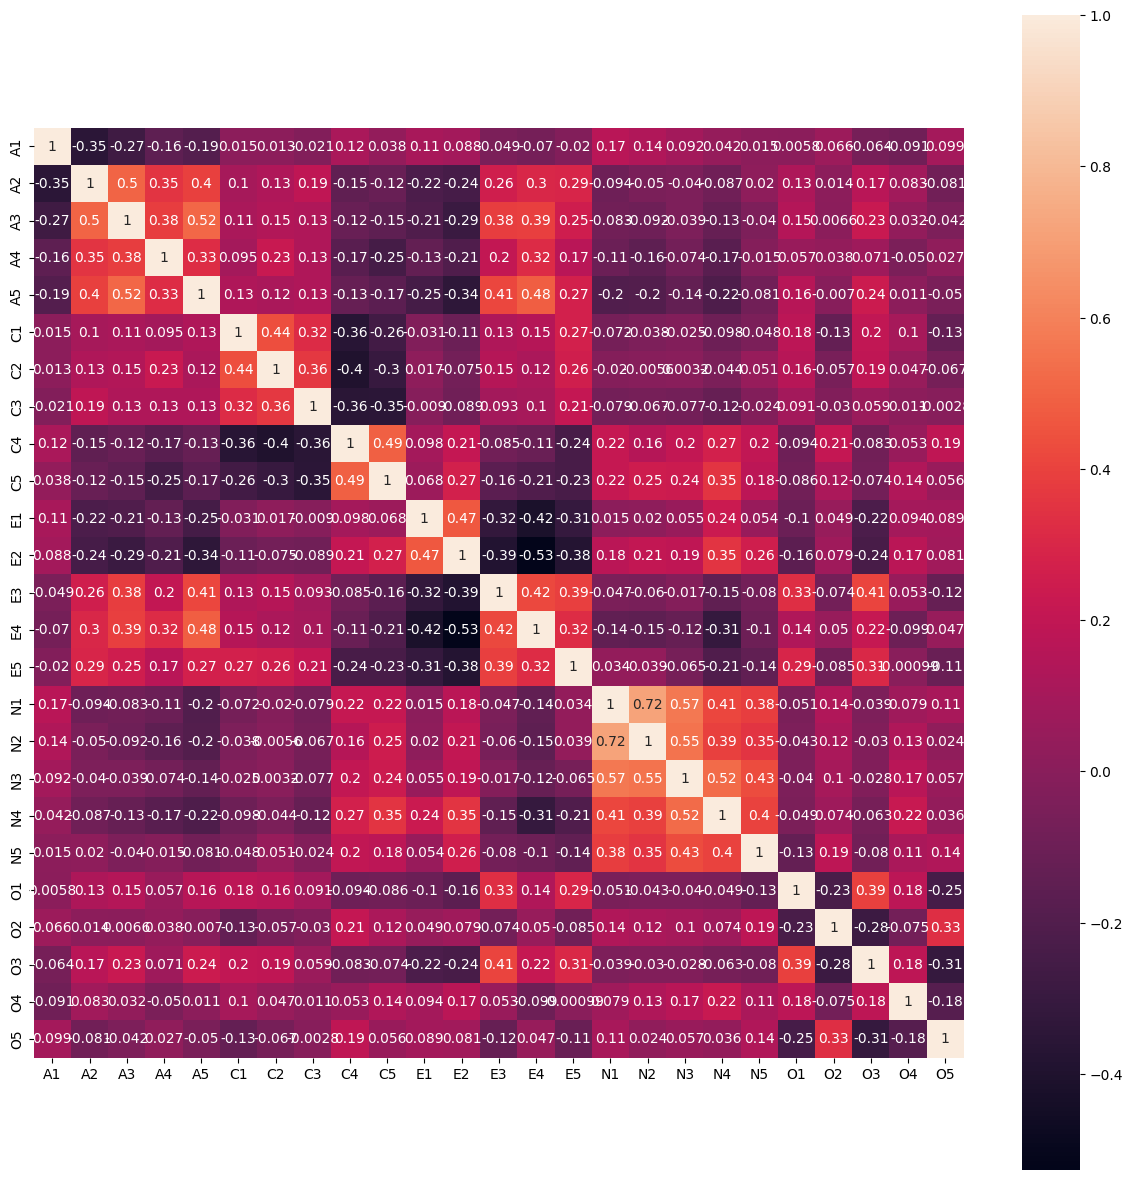

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), square=True, annot=True)
plt.show()

# Primary Component Analysis

In [24]:
PCA = PCA()

PCA.fit(df)

df_pca = PCA.transform(df)

In [10]:
df_pca[:,1]

array([ 2.26949623, -0.91434146, -0.88646842, ..., -0.01224683,
       -1.44521814,  6.58540721])

In [25]:
df_pca

array([[ 2.19578142e+00,  2.26949623e+00, -3.84458380e+00, ...,
         2.92954747e-01,  2.82842175e-01,  2.20168094e-01],
       [ 4.37067907e-01, -9.14341460e-01, -1.82540696e+00, ...,
         7.30168315e-01,  1.42636577e-01, -2.05929611e-03],
       [ 1.36090099e+00, -8.86468418e-01,  2.47384571e-01, ...,
        -5.21291201e-01, -6.54292868e-01,  2.76445129e-01],
       ...,
       [-2.36940978e+00, -1.22468341e-02,  2.13038813e+00, ...,
         1.02307288e-02, -2.38458657e-01,  1.03080590e+00],
       [ 2.29474038e+00, -1.44521814e+00,  7.49582425e-01, ...,
         2.54883888e-01, -4.66172834e-01, -2.95681291e-01],
       [ 9.62588020e-01,  6.58540721e+00,  9.34847808e-01, ...,
         1.21027329e+00,  9.67832636e-01, -1.54621876e-01]])

In [28]:
df_pca.shape

(2436, 25)

In [26]:
PCA.explained_variance_ratio_

array([0.21564969, 0.1196197 , 0.08205133, 0.07045696, 0.06116235,
       0.0421186 , 0.03595086, 0.03464115, 0.0293525 , 0.02831945,
       0.02675912, 0.02401509, 0.02352627, 0.02242577, 0.02148557,
       0.01969017, 0.01935367, 0.01807851, 0.01743876, 0.01652083,
       0.01613562, 0.01499583, 0.01468758, 0.01342346, 0.01214115])

In [27]:
np.cumsum(PCA.explained_variance_ratio_)

array([0.21564969, 0.33526939, 0.41732072, 0.48777768, 0.54894003,
       0.59105863, 0.6270095 , 0.66165065, 0.69100315, 0.71932259,
       0.74608172, 0.77009681, 0.79362308, 0.81604885, 0.83753442,
       0.85722459, 0.87657826, 0.89465677, 0.91209553, 0.92861636,
       0.94475198, 0.9597478 , 0.97443539, 0.98785885, 1.        ])

In [33]:
for i, ratio in enumerate(np.concatenate((np.array([0]), np.cumsum(PCA.explained_variance_ratio_)))):
    print(f'{i}, {ratio}')

0, 0.0
1, 0.21564969342808588
2, 0.33526939070586176
3, 0.4173207229991905
4, 0.48777768206402466
5, 0.5489400275851288
6, 0.5910586319324445
7, 0.6270094954630978
8, 0.6616506477498271
9, 0.6910031473321498
10, 0.7193225931801924
11, 0.7460817156622429
12, 0.7700968088865886
13, 0.7936230764820683
14, 0.816048849569002
15, 0.837534420688845
16, 0.8572245939931911
17, 0.8765782647421294
18, 0.8946567698808312
19, 0.9120955326098601
20, 0.9286163630918686
21, 0.944751978328398
22, 0.9597478035560627
23, 0.9744353867993304
24, 0.9878588508293236
25, 1.0000000000000002
